In [2]:
def time_step(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + dt * (p/mass)
    p_new = p + f * dt
    
    return q_new, p_new

In [3]:
def energy_and_force(q, k):
    """
    U = 1/2 * k * q**2
    
    F = -dU/dq = -k*x
    """
    
    energy = 0.5*k*q**2
    force = -k*q
    
    return energy, force


In [11]:
def md(x0, p0, mass, k, dt, nsteps):
    """
    x0 = starting coordinate
    p0 - starting momentum
    mass - mass of the particle
    k - force constant of the potential
    dt - integration timestep
    nsteps - how many steps we want
    """
    
    X, P, T, E_pot, E_kin, E_tot = [], [], [], [], [], []
    
    x, p = x0, p0
    
    for i in range(nsteps):
        X.append(x)
        P.append(p)
        T.append(i*dt)
        
        e_pot, f = energy_and_force(x, k)
        
        E_pot.append(e_pot)
        e_kin = 0.5*p*p/mass
        E_kin.append(e_kin)
        
        E_tot.append(e_kin + e_pot)
        
        x, p = time_step(x, p, mass, f, dt)
        
    return X, P, T, E_pot, E_kin, E_tot             

In [23]:
import matplotlib.pyplot as plt
import numpy as np


In [44]:
K = 0.1
M = 1.0
omega = np.sqrt(K/M)

X, P, T, E_pot, E_kin, E_tot = md(-1, 0.0, M, K, 0.01, 10000)

In [45]:
t_np = np.array(T)
exact = -np.cos( omega*t_np )

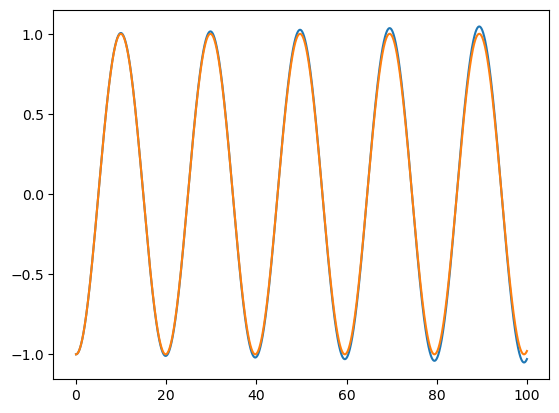

In [46]:
plt.plot(T, X)
plt.plot(t_np, exact)

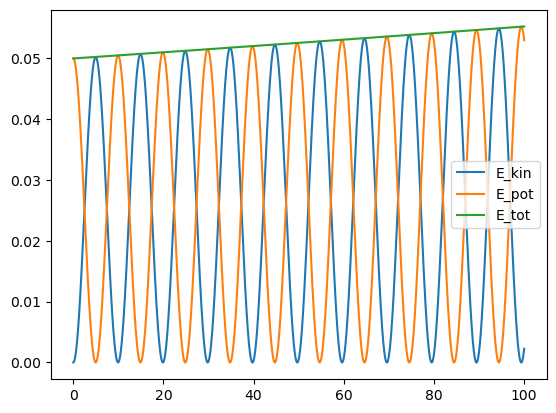

In [47]:
plt.plot(T, E_kin, label="E_kin")
plt.plot(T, E_pot, label="E_pot")
plt.plot(T, E_tot, label="E_tot")
plt.legend()

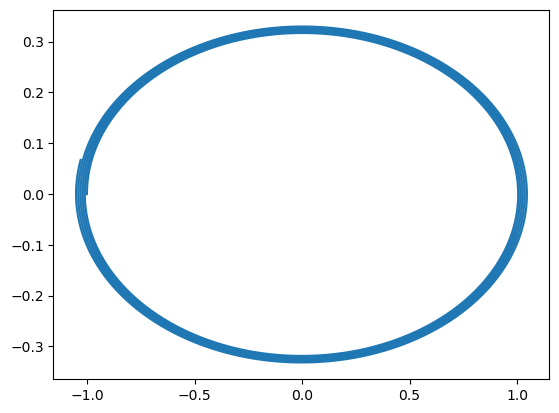

In [48]:
plt.plot(X, P)

In [49]:
# dy/dx = 1/x => dy = dx/x => y(x) = ln(x) + C
# y0 = y(x0) = ln(x0) + C => C = y0 - ln(x0)
# y(x) = ln(x) + y0 - ln(x0) = y0 + ln(x/x0)

In [59]:
def time_step2(x, y, dx):
    """
    x - coordinate
    y - function we are solving for
    dx - integration time step
    """
    
    #y = y + dx * (1.0/x)
    
    #  mid-point version
    y = y + dx * (1.0/(x+0.5*dx))
    
    return y

In [52]:
def ode_solver(x0, y0, dx, nsteps):
    """
    x0 = starting coordinate
    y0 - starting function value    
    dt - integration step
    nsteps - how many steps we want
    """
    
    X, Y = [], []
    
    x, y = x0, y0
    
    for i in range(nsteps):
        X.append(x)
        Y.append(y)        
        
        y = time_step2(x, y, dx)
        x = x + dx
        
    return X, Y

In [60]:
x0, y0 = 1.0, 0.0

X, Y = ode_solver(x0, y0, dx=0.5, nsteps=100)

exact = y0 + np.log( np.array(X) ) - np.log(x0)

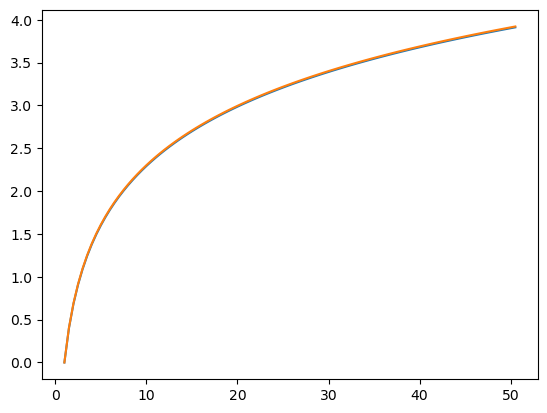

In [61]:
plt.plot(X, Y)
plt.plot(np.array(X), exact)